<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/603_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【Data Scaling(데이터 스케일링)】
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다.
- 피처(feature)=컬럼(column) 들마다 데이터의 값이 범위가 다 제각각이거나 단위가 다른 경우 데이터를 학습을 할때 0으로 수렴하거나 무한으로 발산할 수 있다.
  - 분석시에 변수들이 너무 스케일이 다를 경우  => 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우
  - 신경망 학습시에 => 데이터셋의 값이 들쑥날쑥하거나, 매우 큰 경우에는 cost의 값이 발산하여 정상적인 학습이 이루어지지 않습니다.

- 이런 경우 데이터 스켈링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해 줄 수 있다.
- Scaling 메서드는 scikit-learn의 preprocessing에서 제공한다.
- sklearn에서 제공하는 기본 Scaling 종류
   - StandardScaler : 평균이 0 분산이 1인 정규분포로 변환
   - MinMaxScaler :  0 ~ 1 사이의 실수로 변환
   - RobustScaler : 중앙값이 0, 최대값 1, 최소값 -1 인 분포로 변경
   - MaxAbsScaler : 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 변환
   - Normalizer : 유클리드 거리가 1이 되도록 데이터값을 변환

In [3]:
# '파이썬 라이브러리를 활용한 머신러닝'의 저자가 제공하는 라이브러리
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.2 MB/s eta 0:00:00


In [4]:
import mglearn

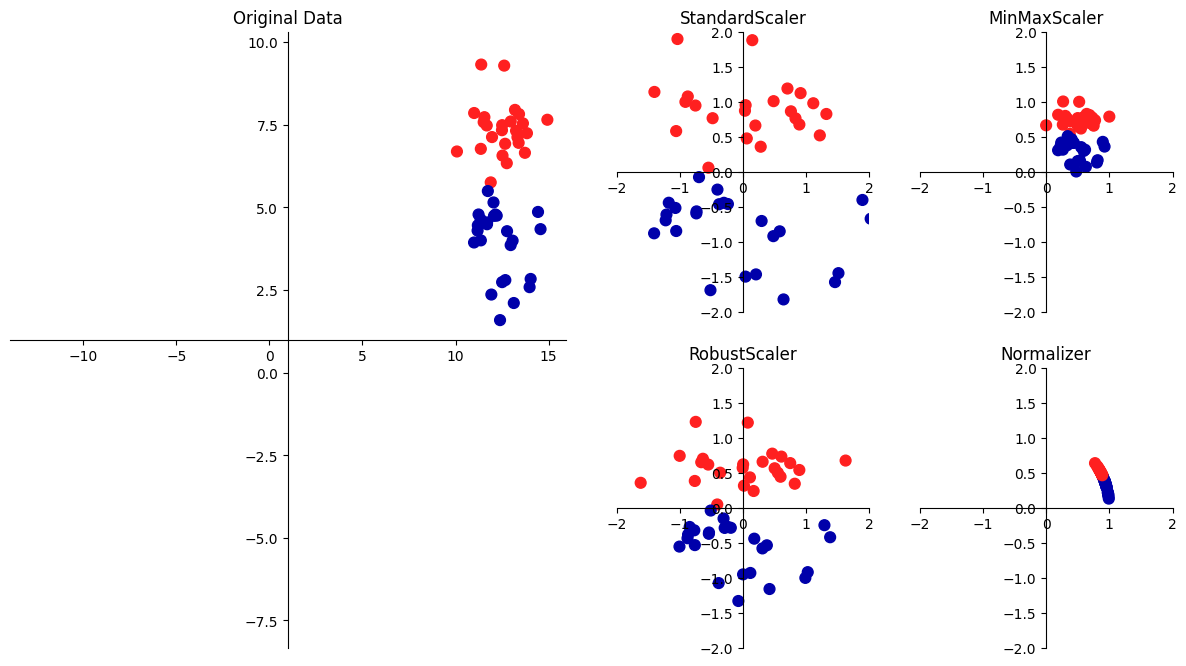

In [6]:
mglearn.plot_scaling.plot_scaling()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [26]:
load_iris = load_iris()
print(dir(load_iris))
iris = pd.DataFrame(load_iris.data, columns=load_iris.feature_names)
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__'

In [27]:
iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
122,7.7,2.8,6.7,2.0
73,6.1,2.8,4.7,1.2
45,4.8,3.0,1.4,0.3
84,5.4,3.0,4.5,1.5
56,6.3,3.3,4.7,1.6


In [28]:
iris['Class'] = load_iris.target
iris['Class'] = iris['Class'].map({0:'Setoda',1:'Versicolour',2:'Virginica'})
iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
25,5.0,3.0,1.6,0.2,Setoda
124,6.7,3.3,5.7,2.1,Virginica
96,5.7,2.9,4.2,1.3,Versicolour
85,6.0,3.4,4.5,1.6,Versicolour
106,4.9,2.5,4.5,1.7,Virginica


In [29]:
from sklearn.model_selection import train_test_split

In [68]:
# 훈련 데이터와 정답 데이터를 나눠준다.
# 훈련 데이터는 대문자 X_관측값훈련,X_관측값테스트
# 정답 데이터는 소문자 y_정답훈련,y_정답테스트
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2) # default test_size : 0.25

In [64]:
print(X_train.shape)
X_train.head(5)

(120, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
90,5.5,2.6,4.4,1.2
129,7.2,3.0,5.8,1.6
75,6.6,3.0,4.4,1.4
3,4.6,3.1,1.5,0.2
111,6.4,2.7,5.3,1.9


In [65]:
print(X_test.shape)
X_test.head(5)

(30, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
41,4.5,2.3,1.3,0.3
13,4.3,3.0,1.1,0.1
5,5.4,3.9,1.7,0.4
121,5.6,2.8,4.9,2.0
17,5.1,3.5,1.4,0.3


In [69]:
y_train.value_counts()

Versicolour    41
Setoda         40
Virginica      39
Name: Class, dtype: int64

In [70]:
y_test.value_counts()

Virginica      11
Setoda         10
Versicolour     9
Name: Class, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, stratify=iris['Class'])

In [84]:
print(X_train.shape)
X_train.head(5)

(120, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
24,4.8,3.4,1.9,0.2
40,5.0,3.5,1.3,0.3
139,6.9,3.1,5.4,2.1
28,5.2,3.4,1.4,0.2
63,6.1,2.9,4.7,1.4


In [85]:
print(X_test.shape)
X_test.head(5)

(30, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
17,5.1,3.5,1.4,0.3
75,6.6,3.0,4.4,1.4
29,4.7,3.2,1.6,0.2
4,5.0,3.6,1.4,0.2


In [86]:
y_train.value_counts()

Setoda         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64

In [87]:
y_test.value_counts()

Setoda         10
Versicolour    10
Virginica      10
Name: Class, dtype: int64

In [88]:
import seaborn as sns

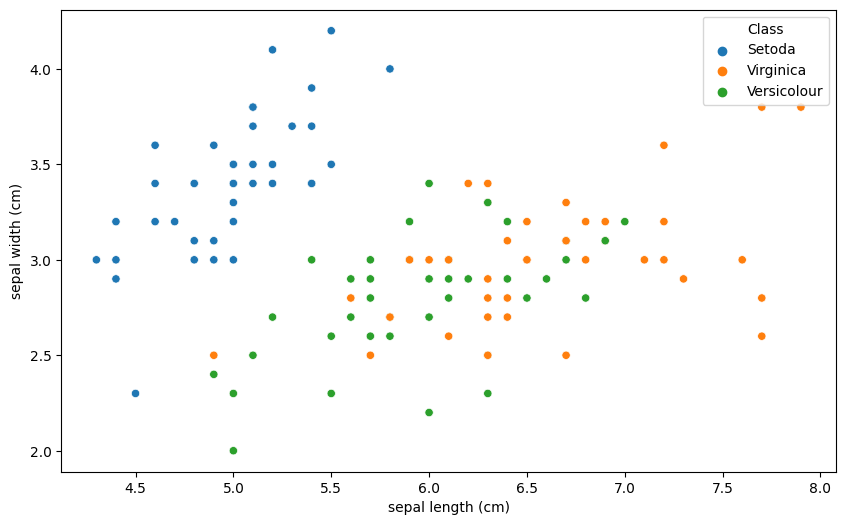

In [89]:
fig = sns.scatterplot(data=X_train, x=X_train.iloc[:,0], y=X_train.iloc[:,1], hue=y_train)
fig.figure.set_size_inches(10,6)

### Standard Scaling

- 표준화 방식으로 평균이 0, 분산이 1인  가우시안 정규 분포를 가진 값으로 변환하는 스케일링이다.
- 최소값과 최대값의 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용하는 것이 좋다.
- 회귀보다는 분류분석에서 유용한다.

In [280]:
StdScaler = StandardScaler()

In [281]:
# train데이터의 fitting과 scaling
StdScaler.fit(X_train) # fit()은 학습시키는 method
X_train_sc = StdScaler.transform(X_train) # transform()은 적용시키는 method

print('\t\t(min,max) (mean,std)')
print('Train_scaled (%.2f,%.2f) (%.2f,%.2f)'%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(),X_train_sc.std()))

		(min,max) (mean,std)
Train_scaled (-2.56,2.69) (0.00,1.00)


In [ ]:
# 학습과 적용을 같이 시킬수는 있으나,
# 실제 작업에서는 fit과 transform을 따로 해야한다.
# StdScaler1 = StandardScaler()
# StdScaler1.fit_transform(X_train)

In [234]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
24,4.8,3.4,1.9,0.2
40,5.0,3.5,1.3,0.3
139,6.9,3.1,5.4,2.1
28,5.2,3.4,1.4,0.2
63,6.1,2.9,4.7,1.4


In [235]:
X_train_sc[:5, :]

array([[-1.24640826,  0.78558951, -1.05231315, -1.30452374],
       [-1.00993555,  1.02424962, -1.38860497, -1.17352554],
       [ 1.23655523,  0.0696092 ,  0.90938913,  1.18444206],
       [-0.77346283,  0.78558951, -1.33255633, -1.30452374],
       [ 0.29066438, -0.40771101,  0.51704867,  0.26745466]])

In [236]:
xt = pd.DataFrame(X_train_sc.T)

In [237]:
xt

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-1.246408,-1.009936,1.236555,-0.773463,0.290664,1.354792,0.054192,2.182446,0.527137,0.645373,...,0.527137,0.290664,2.182446,-1.246408,-1.128172,-0.064045,1.118319,-0.891699,1.473028,0.172428
1,0.785590,1.024250,0.069609,0.785590,-0.407711,0.308269,-0.169051,-0.646371,-1.362351,-0.885031,...,-0.407711,-0.169051,-1.123691,0.785590,-1.362351,-0.885031,-0.646371,-1.362351,-0.169051,0.785590
2,-1.052313,-1.388605,0.909389,-1.332556,0.517049,0.517049,0.236805,1.638021,0.629146,0.853340,...,1.021486,0.629146,1.750119,-1.220459,0.404951,0.741243,0.573097,-0.435778,1.189632,0.404951
3,-1.304524,-1.173526,1.184442,-1.304524,0.267455,0.267455,0.398453,1.053444,0.398453,0.922446,...,0.791447,0.791447,1.446438,-1.304524,0.660449,0.922446,0.267455,-0.125540,1.184442,0.529451


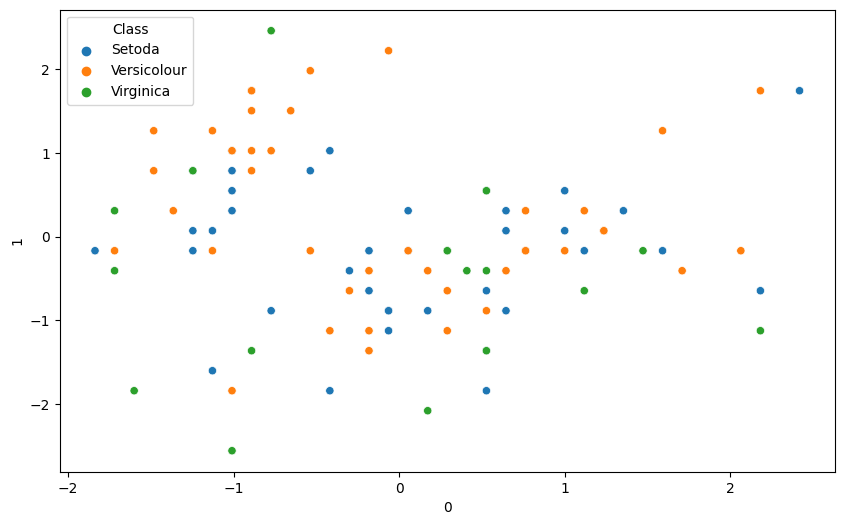

In [238]:
fig = sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### Min-Max Scaler

- 모든 피처들이 0과 1 사이의 값으로 스케일링하는 방식이며 최소값 0, 최대값이 1이 된다.
- 데이터가 2차원인 경우, 모든 데이터는 x, y 축의 0과 1 사이에 존재한다.
- 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 때문에 데이터 그대로 스케일링 방법으로 적절하지 않다.(즉 이상치에 취약하다)
-  그러므로 이상치를 미리 정제한 후 수행하는 것이 좋다.
- 분류보다 회식에 유용하다.

In [239]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

In [240]:
# 훈련데이터의 fitting과 스케일링
MmScaler.fit(X_train)

X_train_sc = MmScaler.transform(X_train)

In [241]:
print('\t\t(min,max) (mean,std)')
print('Train_scaled (%.2f,%.2f) (%.2f,%.2f)'%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(),X_train_sc.std()))

		(min,max) (mean,std)
Train_scaled (0.00,1.00) (0.46,0.27)


In [242]:
X_train_sc.shape

(120, 4)

In [243]:
X_train_sc_flat = X_train_sc.flatten()
print(X_train_sc_flat.shape)
# print(X_train_sc_flat)

(480,)


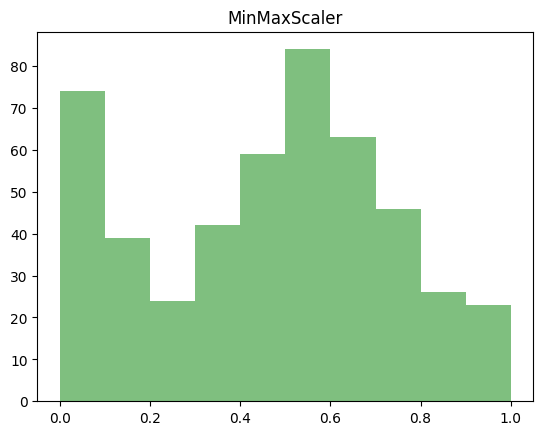

In [244]:
plt.hist(X_train_sc_flat, color='green', alpha = 0.5)
plt.title('MinMaxScaler')
plt.show()

In [247]:
xt = pd.DataFrame(X_train_sc).T

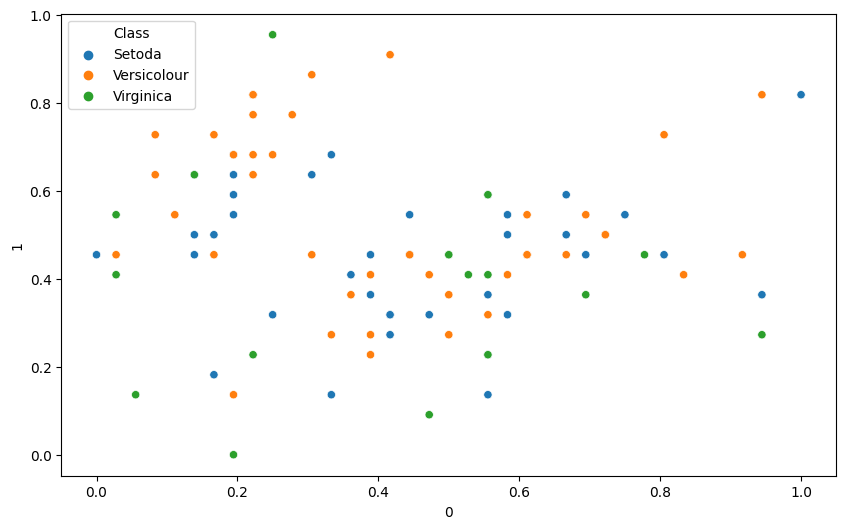

In [248]:
fig = sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### Max Abs Scaler

- 모든 피처들을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.
- 이상치에 민감하며, 분류보다는 회귀분석에서 유용한다.

In [249]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

In [250]:
# 훈련데이터의 fitting과 스케일링
MmScaler.fit(X_train)

X_train_sc = MmScaler.transform(X_train)

In [251]:
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.46, 0.27)


In [252]:
X_train_sc.shape

(120, 4)

In [253]:
xt = pd.DataFrame(X_train_sc.T)

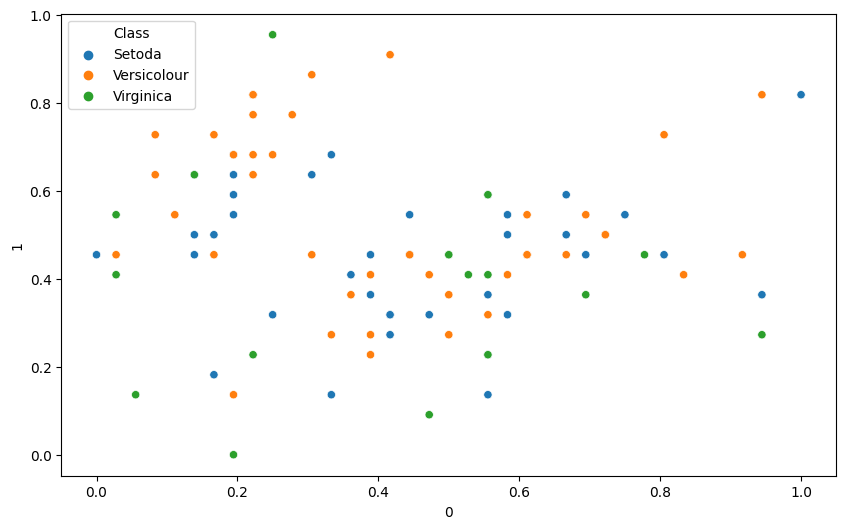

In [255]:
fig = sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### Robust Scaler

- StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 평균과 분산 대신 중앙값(Median)과 사분위(quartile) 값을 활용하는 방식으로, 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화한다.

In [272]:
from sklearn.preprocessing import RobustScaler

RsScaler = RobustScaler()

In [273]:
# 훈련데이터의 fitting과 스케일링
RsScaler.fit(X_train)

X_train_sc = RsScaler.transform(X_train)

In [274]:
print('\t\t(min,max) (mean,std)')
print('Train_scaled (%.2f,%.2f) (%.2f,%.2f)'%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(),X_train_sc.std()))

		(min,max) (mean,std)
Train_scaled (-1.67,2.00) (-0.02,0.60)


In [275]:
X_train_sc.shape

(120, 4)

In [276]:
xt = pd.DataFrame(X_train_sc.T)

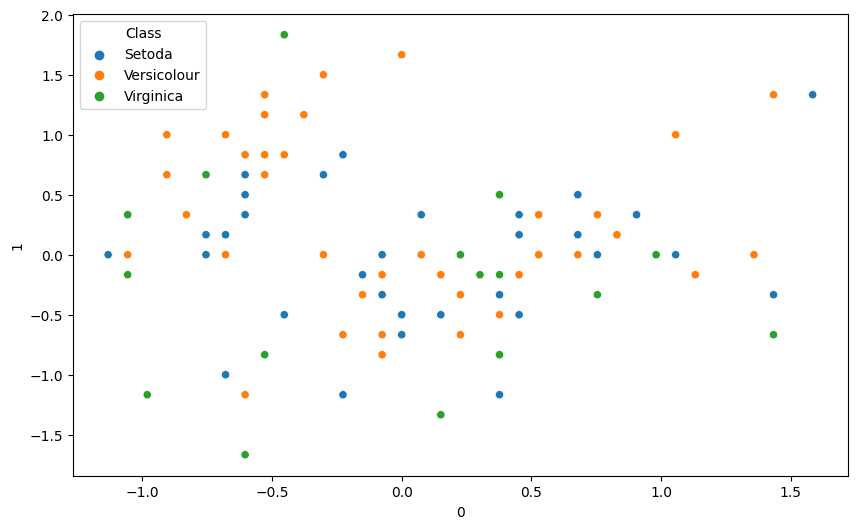

In [277]:
fig = sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

### RobustScaler 원본스케일로 변경

In [278]:
print(X_train.head(3))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
24                 4.8               3.4                1.9               0.2
40                 5.0               3.5                1.3               0.3
139                6.9               3.1                5.4               2.1


In [279]:
X_Original = RsScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,4.8,3.4,1.9,0.2
1,5.0,3.5,1.3,0.3
2,6.9,3.1,5.4,2.1


### Normalizer

- 앞의 4가지 방법은 각 피처(feature)의 통계치를 이용한다. 즉, 열(columns)를 대상으로 한다.
- 그러나 Normalizer 의 경우 각 행(row)마다 정규화가 진행한다.
- 이는 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어 준다.
- 이렇게 하면 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수  있다.

In [262]:
from sklearn.preprocessing import Normalizer

NoScaler = Normalizer()

In [263]:
NoScaler.fit(X_train)
X_train_sc = NoScaler.transform(X_train)

In [264]:
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.01, 0.86) (0.44, 0.24)


In [265]:
X_train_sc.shape

(120, 4)

In [266]:
xt = pd.DataFrame(X_train_sc.T)

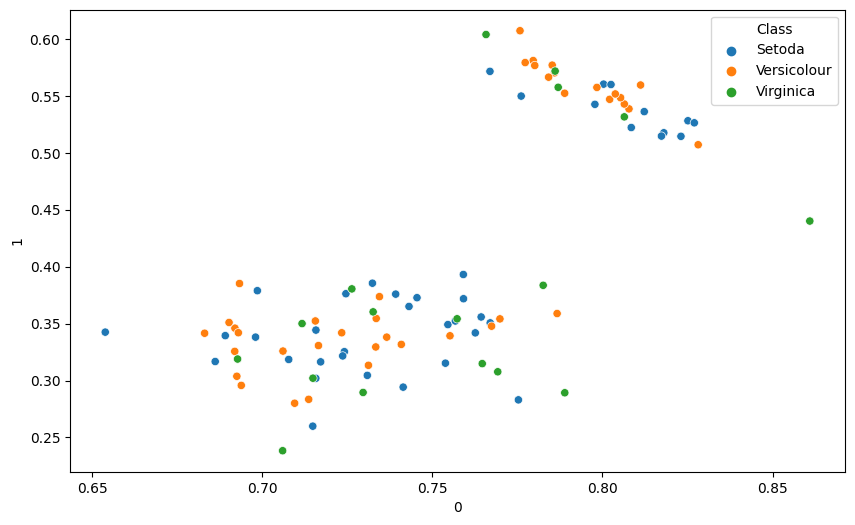

In [267]:
fig = sns.scatterplot(data=xt, x=xt.iloc[0,:], y=xt.iloc[1,:], hue=y_train)
fig.figure.set_size_inches(10,6)

In [227]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
24,4.8,3.4,1.9,0.2
40,5.0,3.5,1.3,0.3
139,6.9,3.1,5.4,2.1


In [228]:
X_train.T.head(3)

,24,40,139,28,63,50,61,122,72,111,...,103,127,118,11,106,101,76,98,102,85
sepal length (cm),4.8,5.0,6.9,5.2,6.1,7.0,5.9,7.7,6.3,6.4,...,6.3,6.1,7.7,4.8,4.9,5.8,6.8,5.1,7.1,6.0
sepal width (cm),3.4,3.5,3.1,3.4,2.9,3.2,3.0,2.8,2.5,2.7,...,2.9,3.0,2.6,3.4,2.5,2.7,2.8,2.5,3.0,3.4
petal length (cm),1.9,1.3,5.4,1.4,4.7,4.7,4.2,6.7,4.9,5.3,...,5.6,4.9,6.9,1.6,4.5,5.1,4.8,3.0,5.9,4.5
